<a href="https://colab.research.google.com/github/p25-c4/kerly_project/blob/main/0315_SG_%EC%A3%BC%EB%AC%B8%EC%83%81%ED%92%88%EB%B3%91%ED%95%A9_%EA%B8%B0%ED%83%80%EC%A0%9C%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [62]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data load

In [64]:
users = pd.read_csv("on_users.csv", encoding='cp949')
print(users.shape)
users.head()

(3000, 5)


,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y


In [65]:
orders = pd.read_csv("on_orders.csv", encoding='cp949')
print(orders.shape)
orders.head()

(1043272, 6)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00
1,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M15-S0140-1247,7680,04DEC2021:03:26:00
2,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M23-S0580-1047,12420,04DEC2021:03:26:00
3,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M12-S0640-1010,6250,04DEC2021:03:26:00
4,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M17-S0130-1018,14450,04DEC2021:03:26:00


In [66]:
items = pd.read_csv("on_items.csv", encoding='utf-8')
print(items.shape)
items.head()

(11019, 11)


,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
0,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입(가공식품),2021,15840,16130
1,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입(가공식품),2022,17030,17340
2,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입(가공식품),2023,17380,18640
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160


In [67]:
## order와 item 합치기
# items에서 PriceYear, PriceMax, PriceMin 제거 --> 중복된 data가 들어가는 것을 막기 위함
items_NoPrice = items.iloc[:,:-3]

order_item_df = pd.merge(orders, items_NoPrice, on='ItemCode', how='left')

# 병합된 데이터프레임의 처음 몇 행을 출력하여 확인
order_item_df = order_item_df.drop_duplicates(ignore_index= True)
print(order_item_df.shape)
order_item_df.head()

(1043272, 13)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName
0,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스
1,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M15-S0140-1247,7680,04DEC2021:03:26:00,L1,가공식품,M15,냉동,S0140,냉동,베지가든 수제교자만두 매콤한 김치맛 720g (360gx2개입)
2,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M23-S0580-1047,12420,04DEC2021:03:26:00,L1,가공식품,M23,축산,S0580,치즈,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉
3,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M12-S0640-1010,6250,04DEC2021:03:26:00,L4,신선식품,M12,과일,S0640,토마,[계양구 배달] 싱싱한 방울토마토 750g [작전 과일나라]
4,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M17-S0130-1018,14450,04DEC2021:03:26:00,L4,신선식품,M17,수산,S0130,낙지,낙지호롱 900g 20-25개 낙지꼬치구이 냉동낙지 (양념소스70gx1팩 제공)


# check the data

## 결측치 및 이상치 탐지

In [68]:
# 결측치 탐지(결측치 없음)
print(orders.isnull().sum(),
      users.isnull().sum(),
      items.isnull().sum())

idUser        0
idOrder       0
OrderDT       0
ItemCode      0
Price         0
DeliveryDT    0
dtype: int64 idUser         0
Gender         0
Age            0
FamilyCount    0
MemberYN       0
dtype: int64 ItemLargeCode     0
ItemLargeName     0
ItemMiddleCode    0
ItemMiddleName    0
ItemSmallCode     0
ItemSmallName     0
ItemCode          0
ItemName          0
PriceYear         0
PriceMin          0
PriceMax          0
dtype: int64


최소 나이:  21 
 최대 나이:  69
최소 구성원 수:  0 
 최대 구성원 수:  3


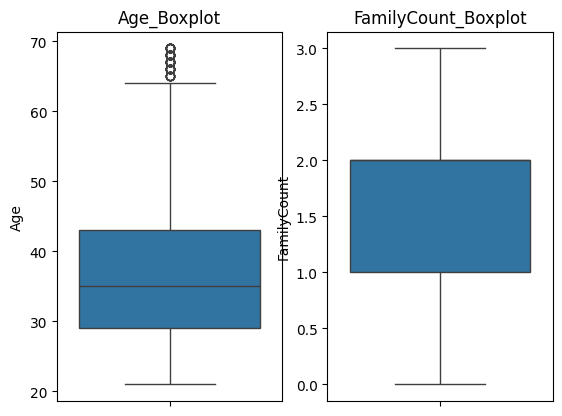

In [69]:
# 이상치 탐지(나이, 가족 구성원 수) --> 이상치 없음
plt.subplots(ncols=2)

plt.subplot(121)
sns.boxplot(data = users, y = 'Age')
plt.title("Age_Boxplot")
print("최소 나이: ", np.min(users['Age']), "\n", "최대 나이: ", np.max(users['Age']))

plt.subplot(122)
sns.boxplot(data = users, y = 'FamilyCount')
plt.title("FamilyCount_Boxplot")
print("최소 구성원 수: ", np.min(users['FamilyCount']), "\n", "최대 구성원 수: ", np.max(users['FamilyCount']))


In [70]:
# 주문에서 대분류 비율 확인("신선식품", "가공식품", "생수", "음료")
order_item_df['ItemLargeName'].value_counts(normalize=True)

신선식품    0.515327
가공식품    0.464597
음료      0.015895
생수      0.004181
Name: ItemLargeName, dtype: float64

# preprocessing

## not_food 처리

In [71]:
# list of not food --> 시간 오래 걸렸음
not_food = ["냄비", "기계", "디스펜서", "퍼즐", "냉장고", "밀폐용기",
            "액자", "수동 반죽펴기", "채칼", "캔따기", "모자",
            "카지노","용기","케이스","만두통", "바람개비", "레깅스", "수박 나무라고요",
            "스텐 상추바구니 2호 야채 튀김 과일 바스켓 채반",
            "스테인레스 상추바구니 1호 메쉬바구니 소쿠리 채반",
            "스텐 타공상추바구니 2호","수박과도 大 (10개묶음) 0151","양상추 1cm 샌들 슬리퍼  JG6 (7157830)",
            "후르츠커버포켓크로스백(수박)", "양상추 여름 블라우스 JAP60 (7271217)", "양상추 여자 슬랙스 BF33 (7416269)",
            "양상추 여자 여름샌들 JK131 (7162818)", "MT124 A4 참외색 매직터치 두성 180g 10매입 X ( 3세트 )",
            "에이프릴래빗 양상추 스트링 빅포켓 숏야상점퍼 MA0906 (6660376)", "사랑에 빠진 과일토퍼 - 참외",
            "[총알배송] 제오닉 화채 수박통 8L 채반 믹싱볼 샐러드볼 판촉물 답례품 사은",
            "익사이팅 컬러링토이 유화물감 스포츠 스포츠 참외",
            "[하프클럽/한샘]SOK 프레시 여름 사각 수박용기 4L 2P",
            "참외 모형 1P (소)", "양상추키우기 7종", "양상추키우기 7종 채소키우기", "나 채소",
            "초 가을 계절 개성 캐쥬얼 참외 껍질 쿨링 여성", "22511712S3488857739", "타공 상추 바구니 2호 과일채소 씻어 빠른건조 주방",
            "OBSESSION 100g150g200g250g300g Kabura Bullet 금속 지그 헤드 오징어 어시", "나혼자키운다(대파)",
            "밀폐용기 42호 3L 2P세트 수박보관통 과일 대파 냉장고수납 야채 냉동실정리", "양파 대파 감자 마늘 생강 조개 과일망 메시 메쉬 그물망 일자형"
            ]
len(not_food)

44

In [72]:
# ItemName에 not_food의 값이 포함된 경우 추출
not_food_order_item = order_item_df[order_item_df['ItemName'].apply(lambda x: any(item for item in not_food if item in x))]
print(not_food_order_item.shape)
not_food_order_item.head()

(21771, 13)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName
103,U10001,U10001-O2021-1021,11SEP2021:08:18:12,L4-M12-S0430-1008,1320,13SEP2021:05:56:00,L4,신선식품,M12,과일,S0430,수박,DIY614 수박바람개비만들기
186,U10001,U10001-O2022-1009,28SEP2022:18:40:30,L4-M12-S0560-1016,13780,29SEP2022:05:41:00,L4,신선식품,M12,과일,S0560,참외,초 가을 계절 개성 캐쥬얼 참외 껍질 쿨링 여성 22511712S3488857739
295,U10001,U10001-O2023-1004,06DEC2023:15:25:42,L4-M12-S0430-1013,22900,07DEC2023:06:32:00,L4,신선식품,M12,과일,S0430,수박,[하프클럽/한샘]SOK 프레시 여름 사각 수박용기 4L 2P
309,U10001,U10001-O2023-1006,15MAY2023:18:17:30,L4-M12-S0430-1026,15870,16MAY2023:07:47:00,L4,신선식품,M12,과일,S0430,수박,아이폰12 달콤수박 하드 케이스
352,U10001,U10001-O2023-1012,01OCT2023:14:55:08,L1-M11-S0220-1091,14450,02OCT2023:06:55:00,L1,가공식품,M11,곡물,S0220,라면,오뚜기 열라면 용기 105g x 12개(1박스)


    - 총 21771 개(총 주문 데이터의 약 2%)
    - 분석 대상이 아님 --> 제외

In [76]:
# order_item_df 에서 not_food 제거
order_item_df = order_item_df.drop(index = not_food_order_item.index)

# item + order EDA
    - 품목(대분류, 중분류, 소분류, 아이템) 별 매출
    - 몇 시까지 주문해야 다음 날 오는지
    - 배송지연 (아침 7시 기준) --> Delay_YN 파생변수
    - 품목별 판매량

In [77]:
# 대분류별 매출
order_item_df.groupby("ItemLargeName")['Price'].sum()

ItemLargeName
가공식품    6720734130
생수        58514340
신선식품    8657357160
음료       284289100
Name: Price, dtype: int64

In [78]:
items.shape

(11019, 11)

In [ ]:
#
orders_df.groupby('irOrder').filter(lambda x: x['ItemCode'].nunique() > 1)